In [1]:
from google.colab import files
uploaded=files.upload()

Saving data.zip to data.zip


In [2]:
import zipfile
import os

zip_path = "/content/data.zip"  # তোমার ফাইলের নাম যদি অন্য কিছু হয়, এখানে বদলাও
extract_dir = "/content/traffic_sign_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [3]:
import os

for folder in os.listdir(extract_dir):
    print(folder)


Test
Train
signnames.csv
Train.csv
Meta.csv
Test.csv
Meta


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image preprocessing + split (80% train, 20% validation)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    extract_dir + "/Train",   # folder with subfolders (0, 1, 2...)
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_data = datagen.flow_from_directory(
    extract_dir + "/Train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print("✅ Train and Validation sets loaded successfully!")


Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.
✅ Train and Validation sets loaded successfully!


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,284,203 (4.90 MB)

 Trainable params: 1,284,203 (4.90 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

# Save the model
model.save("traffic_sign_cnn.h5")
print("✅ Model trained and saved successfully!")


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 255s 257ms/step - accuracy: 0.4274 - loss: 2.0892 - val_accuracy: 0.8907 - val_loss: 0.3827
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 255s 260ms/step - accuracy: 0.9340 - loss: 0.2234 - val_accuracy: 0.9369 - val_loss: 0.2400
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 250s 255ms/step - accuracy: 0.9677 - loss: 0.1097 - val_accuracy: 0.9441 - val_loss: 0.2310
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 250s 255ms/step - accuracy: 0.9788 - loss: 0.0705 - val_accuracy: 0.9422 - val_loss: 0.2898
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 250s 255ms/step - accuracy: 0.9814 - loss: 0.0618 - val_accuracy: 0.9496 - val_loss: 0.2521
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 255s 260ms/step - accuracy: 0.9859 - loss: 0.0455 - val_accuracy: 0.9543 - val_loss: 0.2092
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 255s 260ms/step - accuracy: 0.9877 - loss: 0.0409 - val_accuracy: 0.9371 - val_loss: 0.3333
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 252s 257ms/step - accuracy: 0.9887 -

✅ Model trained and saved successfully!


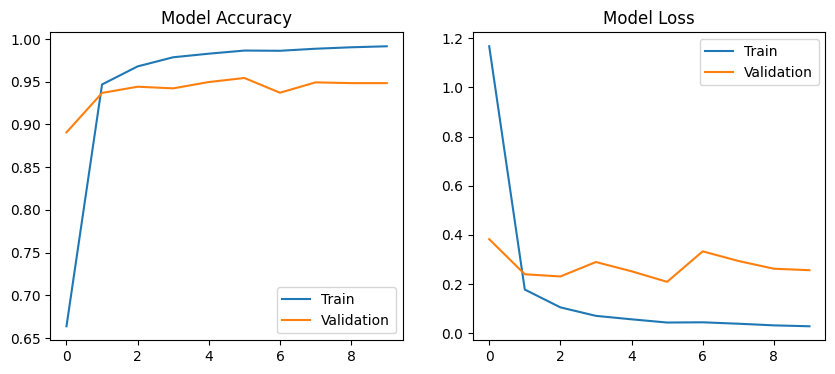

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()

plt.show()


In [10]:
import os

base_dir = "/content/traffic_sign_data"
for root, dirs, files in os.walk(base_dir):
    print(root)
    break


/content/traffic_sign_data


In [11]:
train_dir = os.path.join(base_dir, "Train")
classes = os.listdir(train_dir)
print("Found Classes:", len(classes))
print("Example classes:", classes[:5])


Found Classes: 43
Example classes: ['31', '36', '19', '13', '11']


In [12]:
sample_class = classes[0]  # প্রথম class ফোল্ডার
sample_dir = os.path.join(train_dir, sample_class)

# ওই class ফোল্ডারের প্রথম ছবি দেখাও
sample_image = os.listdir(sample_dir)[0]
img_path = os.path.join(sample_dir, sample_image)

print("Sample image path:", img_path)


Sample image path: /content/traffic_sign_data/Train/31/00031_00007_00006.png


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Predicted Class: 25


In [14]:
!zip -r traffic_sign_data.zip /content/traffic_sign_data
files.download("traffic_sign_data.zip")


Streaming output truncated to the last 5000 lines.
  adding: content/traffic_sign_data/Train/1/00001_00064_00011.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00026_00015.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00066_00022.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00003_00021.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00066_00005.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00053_00014.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00003_00017.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00055_00023.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00051_00004.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00070_00025.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00021_00015.png (stored 0%)
  adding: content/traffic_sign_data/Train/1/00001_00065_00020.png (stored 0%)
  adding: con

AttributeError: 'list' object has no attribute 'download'

In [15]:
from google.colab import files


In [16]:
!zip -r traffic_sign_data.zip /content/traffic_sign_data


Streaming output truncated to the last 5000 lines.
updating: content/traffic_sign_data/Train/1/00001_00064_00011.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00026_00015.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00066_00022.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00003_00021.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00066_00005.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00053_00014.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00003_00017.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00055_00023.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00051_00004.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00070_00025.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00021_00015.png (stored 0%)
updating: content/traffic_sign_data/Train/1/00001_00065_00020.png (stored 0%)
updating: con

In [17]:
files.download("traffic_sign_data.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>